# Exploratory data analysis

Attribute Information:

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

### these grades are related with the course subject, Math or Portuguese:

31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv("../data/student-math.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
num_cols = ["G3", "age", "absences", "G1", "G2"]

cat_cols = []

for column in df.columns:
    if column not in num_cols:
        cat_cols.append(column)

for column in cat_cols:
    df[column] = df[column].astype("category")

In [4]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile

## Crosstabs

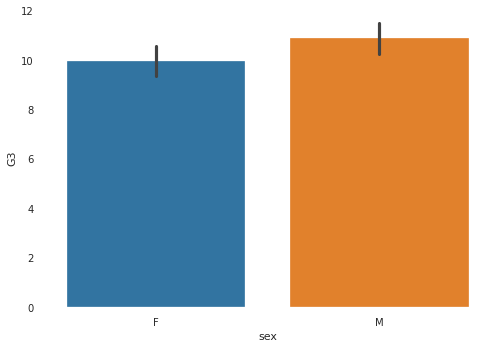

In [5]:
# males perform slightly better
sns.barplot(x = "sex", y="G3",data=df)

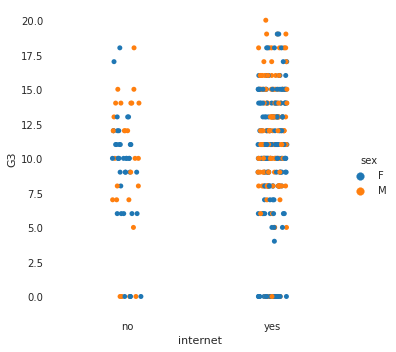

In [6]:
# those without internet tend to perform worset
sns.catplot(x = "internet", y="G3", hue="sex", data=df)

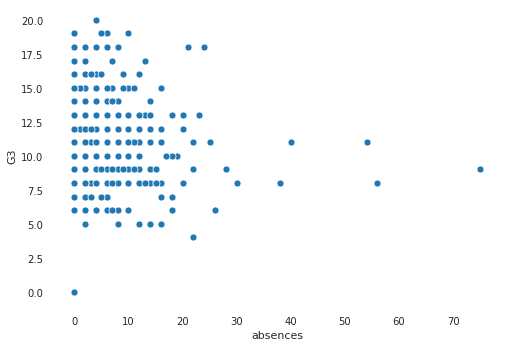

In [7]:
sns.scatterplot(x="absences", y="G3", data=df)

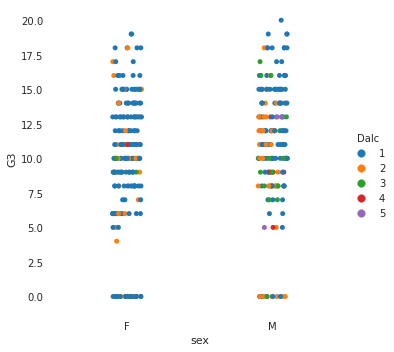

In [8]:
# female alcohol consumption is low
sns.catplot(x = "sex", y="G3", hue="Dalc", data=df)

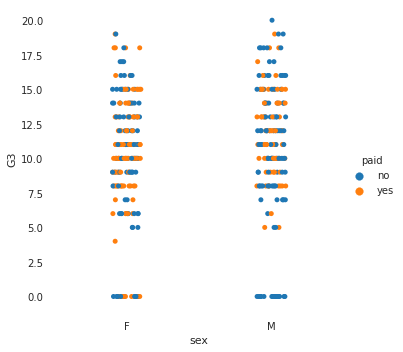

In [9]:
sns.catplot(x = "sex", y="G3", hue="paid", data=df)

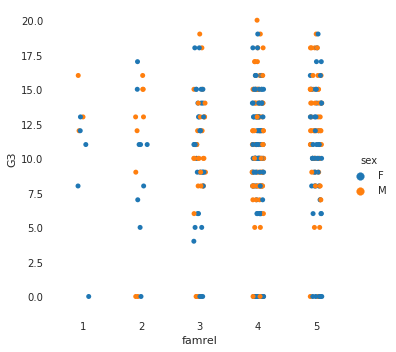

In [10]:
# more men than women have bad family relations
sns.catplot(x = "famrel", y="G3", hue="sex", data=df)

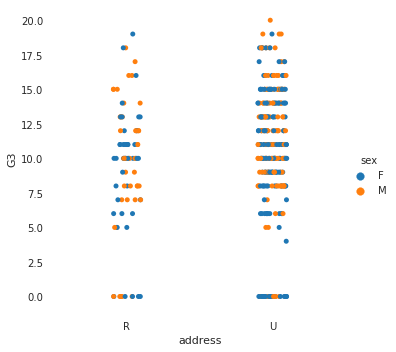

In [11]:
# more men in rural areas
sns.catplot(x = "address", y="G3", hue="sex", data=df)

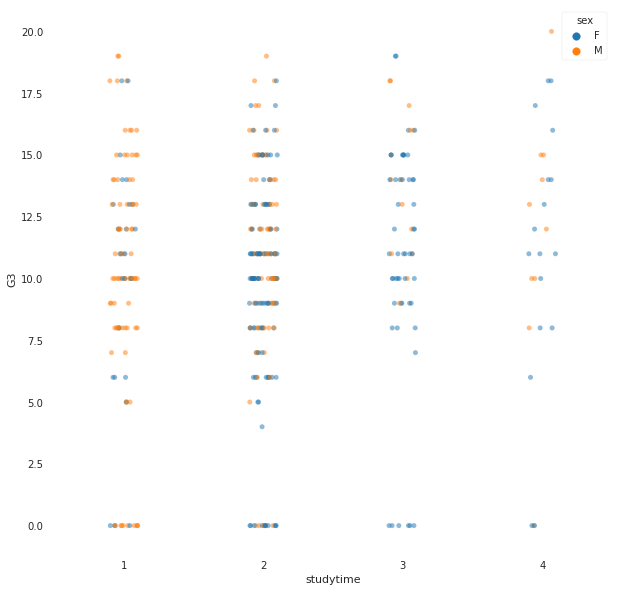

In [12]:
# boys study less but get same grades as girls
fig, ax = plt.subplots(figsize=[10, 10])
sns.stripplot(x="studytime", y="G3", hue="sex", data=df, ax=ax, alpha=0.5)

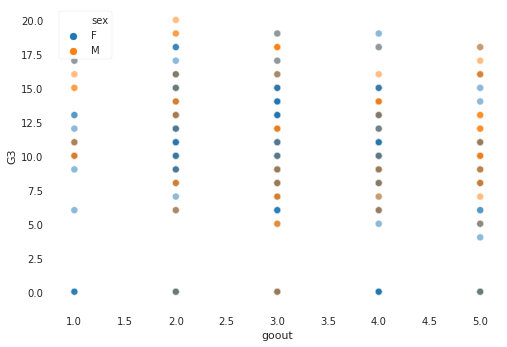

In [13]:
sns.scatterplot(x = "goout", y="G3", hue="sex", data=df, alpha=0.5)

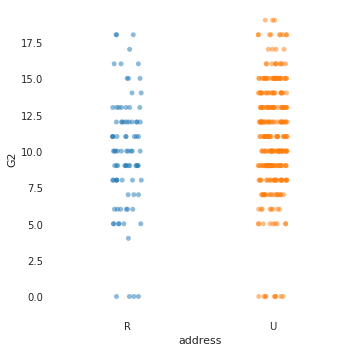

In [14]:
sns.catplot(x = "address", y="G2", data=df, alpha=0.5)

## Grade "Tiers"

### Below average

In [15]:
# let's look at those with average/below average grades
g3_mean = df["G3"].mean()
below_avg_grade_mask = df["G3"] < g3_mean
df_below_avg = df[below_avg_grade_mask]

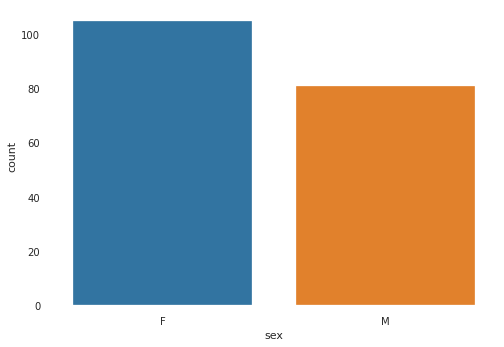

In [16]:
# more females have below average grades
sns.countplot(x="sex", data=df_below_avg)

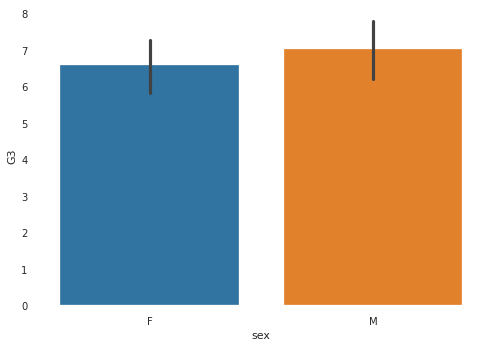

In [17]:
# even when below average males tend to have better grades on average
sns.barplot(x="sex", y="G3", data=df_below_avg)

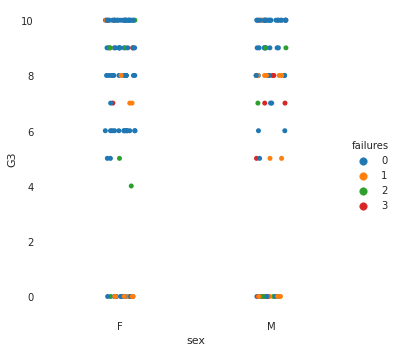

In [18]:
# females don't seem to have any previous failures
sns.catplot(x="sex", y="G3", hue="failures", data=df_below_avg)

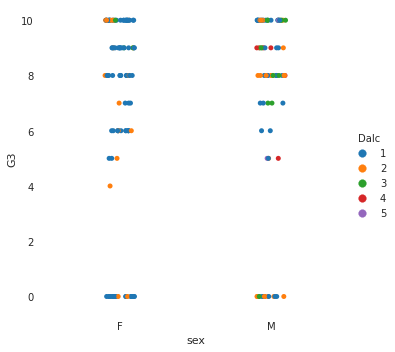

In [19]:
sns.catplot(x="sex", y="G3", hue="Dalc", data=df_below_avg)

### Above average

In [20]:
# let's look at those with above average grades
above_avg_grade_mask = df["G3"] > g3_mean
df_above_avg = df[above_avg_grade_mask]

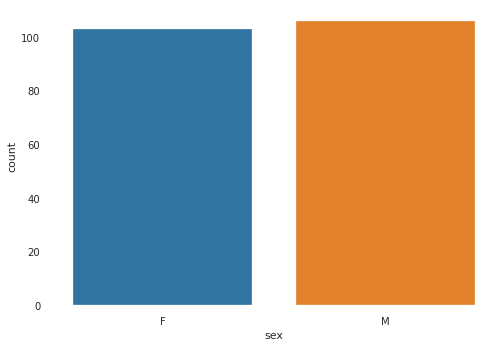

In [21]:
# slightly more males
sns.countplot(x = "sex", data=df_above_avg)

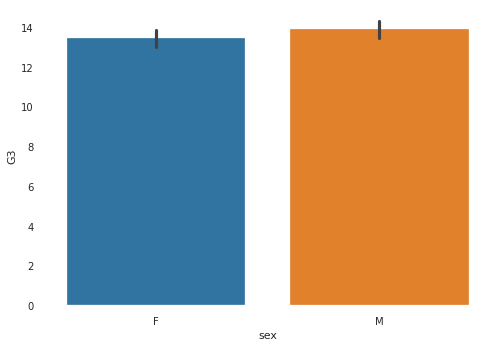

In [22]:
# males have slightly higher grades (not as much as below average)
sns.barplot(x = "sex", y="G3" , data=df_above_avg)

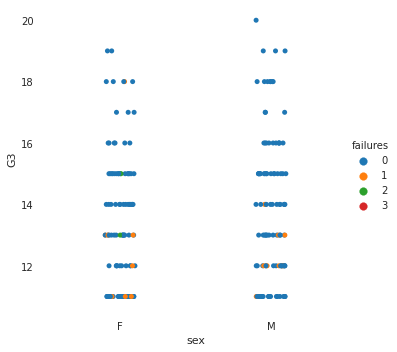

In [23]:
# no previous failures
sns.catplot(x = "sex", y="G3", hue="failures", data=df_above_avg)

## Zero grades

In [24]:
# let's look at those with above average grades
zero_grade_mask = df["G3"] == 0
df_zero_grade = df[zero_grade_mask]

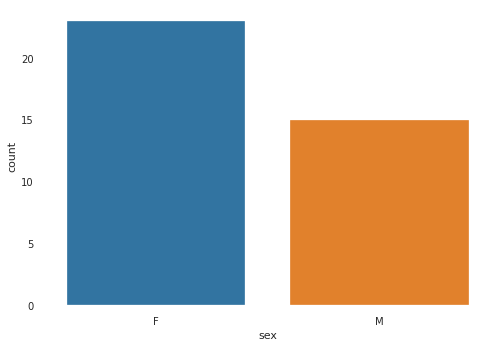

In [25]:
# more women get grade of 0
sns.countplot(x = "sex", data=df_zero_grade)

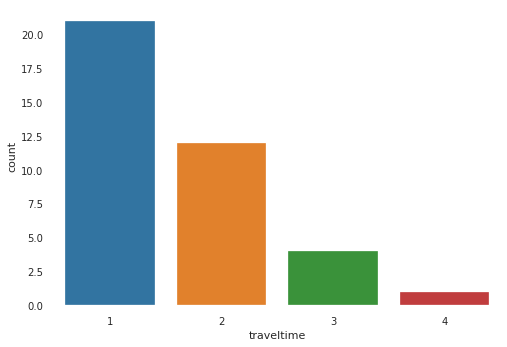

In [26]:
sns.countplot("traveltime", data=df_zero_grade)

## Binary G3

In [27]:
for idx, grade in enumerate(df["G3"]):
    if grade > df["G3"].mean():
        df.loc[idx, "target"] = 1
    else:
        df.loc[idx, "target"] = 0

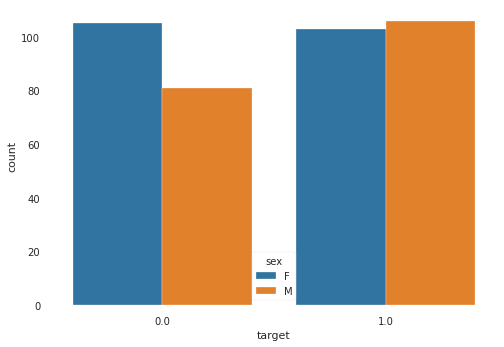

In [32]:
# More females than males get below average grades
sns.countplot("target", hue="sex", data=df)

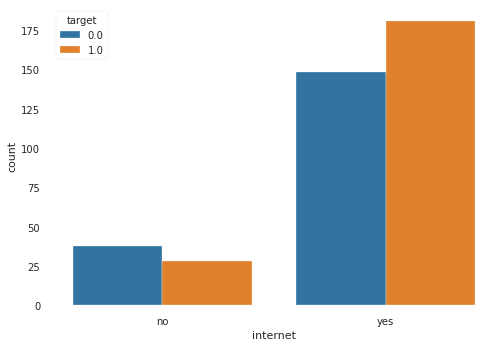

In [36]:
# More students without 
sns.countplot("internet", hue="target", data=df)

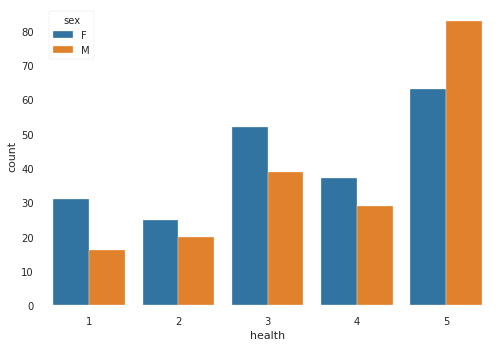

In [39]:
sns.countplot("health", hue="sex", data=df)